# Problem
Decreased Weekly Active Users from the end of July through August

# Objective
Find out why? List your hypothesis.

Situation
Product
Customer

1. Situation: is it holiday? / most of users are taking personal holidays? 

--> Need to compare with past trend

2. Customer: is it due to decreased new users joining or decreased engagement of current users?

--> Check trend of new users and current users to find out who (or which customer segment) decreased engagement

3. Product: which feature of the product/categories of product usage is losing customers?

--> Need to look at product features usage data; 


4. Competitor: Is it because it lose customers to competitors? Are they lauching new features? Are they having a new pricing strategy? Running a promotion? New marketing efforts?

--> Look into competitors product/marketing strategy, etc.



# Findings

1. Not due to new user acquisition. 
2. The engagement for phone users has a significant drop. Is the Yammer product not user-friendly in app version?
3. Email click through rate droped during this period. It means that users has decreased interest in clicking links in the email. One linkage is that users that use phones may be less interested in clicking links. Could there be any product optimization in this feature?
4. Cohort analysis indicates that users retention rate dropped to around 25% after 2 to 3 months
5. To do list: groupby user type, language, event names, etc.

In [1]:
#import neccessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)   
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('max_colwidth',100)
import warnings
import scipy
warnings.filterwarnings("ignore")


In [383]:
users = pd.read_csv('yammer_users.csv')
events = pd.read_csv('yammer_events.csv')
emails = pd.read_csv('yammer_emails.csv')
rollup = pd.read_csv('dimension_rollup_periods.csv')

In [10]:
print(users.shape)
users.head()

(19066, 6)


,user_id,created_at,company_id,language,activated_at,state
0,0.000,2013-01-01 20:59:39,5737.000,english,2013-01-01 21:01:07,active
1,1.000,2013-01-01 13:07:46,28.000,english,NaN,pending
2,2.000,2013-01-01 10:59:05,51.000,english,NaN,pending
3,3.000,2013-01-01 18:40:36,2800.000,german,2013-01-01 18:42:02,active
4,4.000,2013-01-01 14:37:51,5110.000,indian,2013-01-01 14:39:05,active


In [11]:
print(events.shape)
events.head()

(340832, 7)


,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.000,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.000
1,10522.000,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.000
2,10522.000,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.000
3,10522.000,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.000
4,10522.000,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.000


In [12]:
print(emails.shape)
emails.head()

(90389, 4)


,user_id,occurred_at,action,user_type
0,0.000,2014-05-06 09:30:00,sent_weekly_digest,1.000
1,0.000,2014-05-13 09:30:00,sent_weekly_digest,1.000
2,0.000,2014-05-20 09:30:00,sent_weekly_digest,1.000
3,0.000,2014-05-27 09:30:00,sent_weekly_digest,1.000
4,0.000,2014-06-03 09:30:00,sent_weekly_digest,1.000


In [13]:
print(rollup.shape)
rollup.head()

(56002, 6)


,period_id,time_id,pst_start,pst_end,utc_start,utc_end
0,1.000,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-01 08:00:00,2013-01-02 08:00:00
1,1.000,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-02 08:00:00,2013-01-03 08:00:00
2,1.000,2013-01-03 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-03 08:00:00,2013-01-04 08:00:00
3,1.000,2013-01-04 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-04 08:00:00,2013-01-05 08:00:00
4,1.000,2013-01-05 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,2013-01-05 08:00:00,2013-01-06 08:00:00


In [24]:
# check the range of user id before merging tables
print(users.describe())
print('number of unique users: ', users.user_id.nunique())
print('***')
      
print(events.describe())
print('number of users that have an event: ',events.user_id.nunique())
print('***')
      
print(emails.describe())
print('number of users that have an email event: ',emails.user_id.nunique())


        user_id  company_id
count 19066.000   19066.000
mean   9532.500    4602.923
std    5504.024    4363.468
min       0.000       1.000
25%    4766.250     109.000
50%    9532.500    3667.500
75%   14298.750    8431.750
max   19065.000   13198.000
number of unique users:  19066
***
         user_id  user_type
count 340832.000 325255.000
mean    9983.836      1.512
std     5369.956      0.755
min        4.000      1.000
25%     5224.000      1.000
50%    11069.000      1.000
75%    14412.000      2.000
max    19065.000      3.000
number of users that have an event:  9760
***
        user_id  user_type
count 90389.000  90389.000
mean   8635.558      2.098
std    4957.735      0.849
min       0.000      1.000
25%    4426.000      1.000
50%    8631.000      2.000
75%   12670.000      3.000
max   19001.000      3.000
number of users that have an email event:  6179


## Look into users table to understand new user trend 

In [53]:
# check data types and null
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 6 columns):
user_id         19066 non-null float64
created_at      19066 non-null datetime64[ns]
company_id      19066 non-null float64
language        19066 non-null object
activated_at    9381 non-null datetime64[ns]
state           19066 non-null object
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 893.8+ KB


looks like only half of users activated their accounts after creating accounts

In [277]:
# convert to datetime
users['created_at'] = pd.to_datetime(users['created_at'], format='%Y-%m-%d %H:%M:%S')
users['activated_at'] = pd.to_datetime(users['activated_at'], format='%Y-%m-%d %H:%M:%S')


In [278]:
print(users.created_at.min())
print(users.created_at.max())

2013-01-01 04:38:30
2014-08-31 20:40:32


In [56]:
#  check number of unique values for each column
def unique_counts(df):
    for i in df.columns:
        count = df[i].nunique()
        print(i, ":", count)
unique_counts(users)

user_id : 19066
created_at : 19056
company_id : 13198
language : 12
activated_at : 9379
state : 2


In [57]:
# define a function to describe data
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ratio = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ratio', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ratio, uniques, skewness, kurtosis], axis = 1, sort=True)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=True)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ratio', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [58]:
details = rstr(users)
display(details.sort_values(by='missing ratio', ascending=False))

Data shape: (19066, 6)
___________________________
Data types:
 float64           2
object            2
datetime64[ns]    2
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ratio,uniques,skewness,kurtosis
activated_at,datetime64[ns],9381,9380,9685,50.797,"[[2013-01-01 21:01:07, NaT, 2013-01-01 18:42:02, 2013-01-01 14:39:05, 2013-01-01 18:38:45, 2013-...",nan,nan
company_id,float64,19066,13198,0,0.000,"[[5737.0, 28.0, 51.0, 2800.0, 5110.0, 2463.0, 11699.0, 4765.0, 2698.0, 1.0, 10.0, 3745.0, 903.0,...",0.452,-1.230
created_at,datetime64[ns],19066,19056,0,0.000,"[[2013-01-01 20:59:39, 2013-01-01 13:07:46, 2013-01-01 10:59:05, 2013-01-01 18:40:36, 2013-01-01...",nan,nan
language,object,19066,12,0,0.000,"[[english, german, indian, spanish, french, arabic, portugese, japanese, italian, chinese, russi...",nan,nan
state,object,19066,2,0,0.000,"[[active, pending]]",nan,nan
user_id,float64,19066,19066,0,0.000,"[[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17...",0.000,-1.200


In [60]:
users.language.value_counts()

english      9585
spanish      1771
french       1522
japanese     1324
german       1067
arabic        768
chinese       685
indian        583
russian       561
portugese     510
italian       420
korean        270
Name: language, dtype: int64

In [62]:
users.language.value_counts(normalize=True)

english     0.503
spanish     0.093
french      0.080
japanese    0.069
german      0.056
arabic      0.040
chinese     0.036
indian      0.031
russian     0.029
portugese   0.027
italian     0.022
korean      0.014
Name: language, dtype: float64

In [65]:
# count the number of users by language
user_country = users.groupby(['language'])['user_id'].aggregate('count').reset_index().sort_values('user_id',ascending=False)

# calcualte percentage
user_country['Percentage'] = round(user_country['user_id']/sum(user_country['user_id'])*100,2)

user_country

,language,user_id,Percentage
2,english,9585,50.270
11,spanish,1771,9.290
3,french,1522,7.980
7,japanese,1324,6.940
4,german,1067,5.600
0,arabic,768,4.030
1,chinese,685,3.590
5,indian,583,3.060
10,russian,561,2.940
9,portugese,510,2.670


Half of users chose English language version of the app

In [247]:
# set index
users.set_index(users['created_at'],inplace=True)

In [252]:
# group by date, check how many new users created accounts
user_date = users['user_id'].resample('D',how='count')

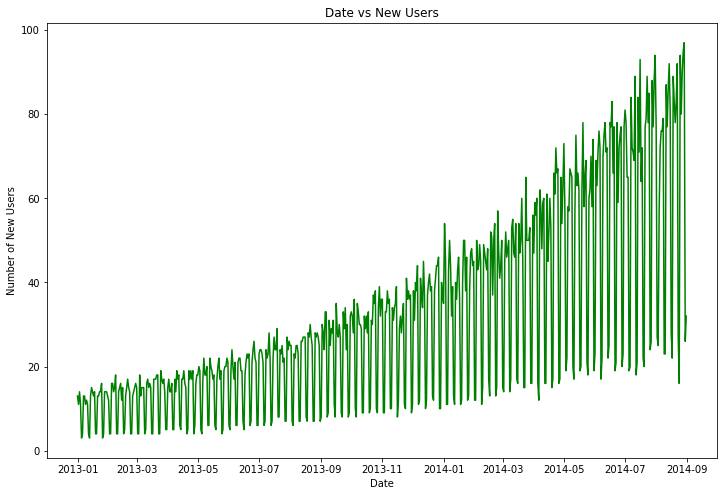

In [106]:
plt.figure(figsize=(12,8))
plt.plot(user_date,color='g')
plt.xlabel('Date')
plt.ylabel('Number of New Users')
plt.title('Date vs New Users')
plt.show()

In [253]:
# group by date, check how many new users activated accounts
activated_date = users['activated_at'].resample('D',how='count')

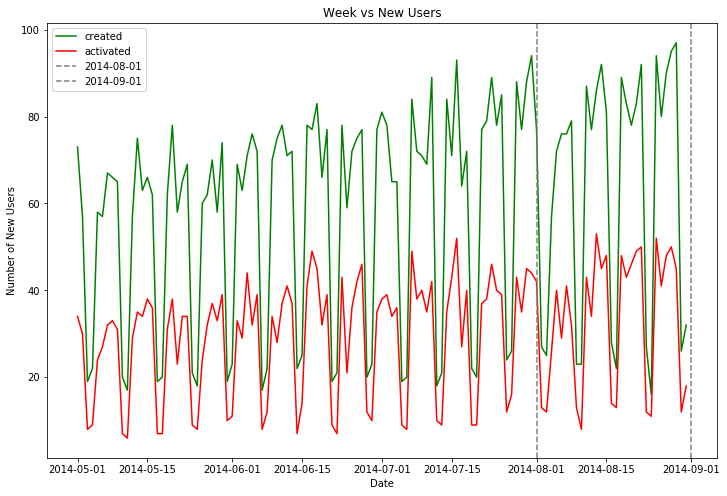

In [251]:
# plot 
start_date = pd.to_datetime('2014-05-1')
end_date = pd.to_datetime('2014-08-31')

plt.figure(figsize=(12,8))
plt.plot(user_date[(start_date <= user_date.index) & (user_date.index <= end_date)],color='g',label='created')
plt.plot(activated_date[(start_date <= activated_date.index) & (activated_date.index <= end_date)],color='r',label='activated')

plt.xlabel('Date')
plt.ylabel('Number of New Users')
plt.title('Week vs New Users')

# create vertical lines
plt.axvline(pd.to_datetime('2014-08-01'),color='grey', linestyle='--', label='2014-08-01')
plt.axvline(pd.to_datetime('2014-09-01'),color='grey', linestyle='--', label='2014-09-01')

plt.legend()
plt.show()

In [254]:
# group by week, check how many new users created accounts
user_week = users['user_id'].resample('W',how='count')


In [255]:
activated_week = users['activated_at'].resample('W',how='count')

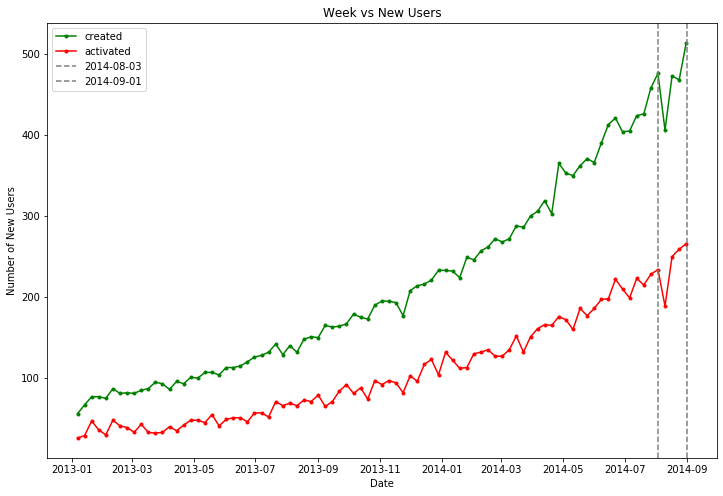

In [309]:
plt.figure(figsize=(12,8))
plt.plot(user_week,color='g',marker = '.',label='created')
plt.plot(activated_week,color='r',marker='.',label='activated')

plt.xlabel('Date')
plt.ylabel('Number of New Users')
plt.title('Week vs New Users')

# create vertical lines
plt.axvline(pd.to_datetime('2014-08-03'),color='grey', linestyle='--', label='2014-08-03')
plt.axvline(pd.to_datetime('2014-09-01'),color='grey', linestyle='--', label='2014-09-01')

plt.legend()
plt.show()

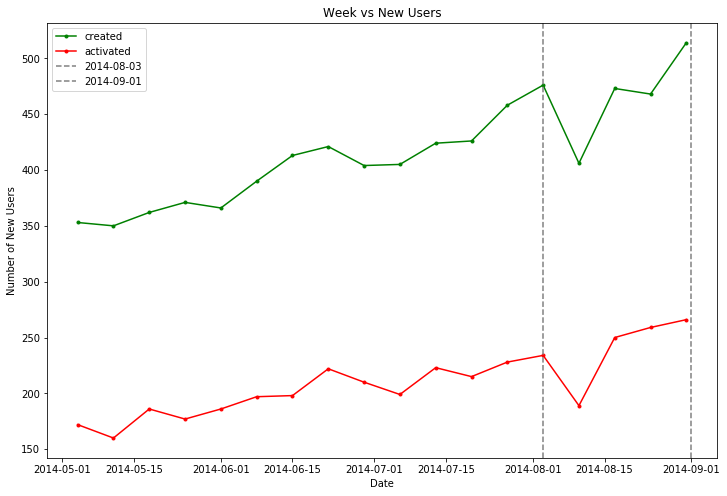

In [308]:
start_date = pd.to_datetime('2014-05-1')
end_date = pd.to_datetime('2014-08-31')

plt.figure(figsize=(12,8))
plt.plot(user_week[(start_date <= user_week.index) & (user_week.index <= end_date)],color='g',marker = '.',label='created')
plt.plot(activated_week[(start_date <= activated_week.index) & (activated_week.index <= end_date)],color='r',marker='.',label='activated')

plt.xlabel('Date')
plt.ylabel('Number of New Users')
plt.title('Week vs New Users')

# create vertical lines
plt.axvline(pd.to_datetime('2014-08-03'),color='grey', linestyle='--', label='2014-08-03')
plt.axvline(pd.to_datetime('2014-09-01'),color='grey', linestyle='--', label='2014-09-01')

plt.legend()
plt.show()

Starting 2014/08/01, the number of new users has a slight drop in the first week of August, but the trend of increasing new users catched up after that. So the engagement issue should not be due to lack of new users. Let's look up exsiting users

In [44]:
print(users.language.value_counts())
print(users.state.value_counts())

english      9585
spanish      1771
french       1522
japanese     1324
german       1067
arabic        768
chinese       685
indian        583
russian       561
portugese     510
italian       420
korean        270
Name: language, dtype: int64
pending    9685
active     9381
Name: state, dtype: int64


In [45]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 6 columns):
user_id         19066 non-null float64
created_at      19066 non-null datetime64[ns]
company_id      19066 non-null float64
language        19066 non-null object
activated_at    9381 non-null datetime64[ns]
state           19066 non-null object
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 893.8+ KB


# Events table

In [161]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340832 entries, 0 to 340831
Data columns (total 7 columns):
user_id        340832 non-null float64
occurred_at    340832 non-null object
event_type     340832 non-null object
event_name     340832 non-null object
location       340832 non-null object
device         340832 non-null object
user_type      325255 non-null float64
dtypes: float64(2), object(5)
memory usage: 18.2+ MB


In [257]:
# convert to datetime
events['occurred_at'] = pd.to_datetime(events['occurred_at'], format='%Y-%m-%d %H:%M:%S')


In [258]:
unique_counts(events)

user_id : 9760
occurred_at : 304922
event_type : 2
event_name : 21
location : 47
device : 26
user_type : 3


In [164]:
details = rstr(events)
display(details.sort_values(by='missing ratio', ascending=False))

Data shape: (340832, 7)
___________________________
Data types:
 object            4
float64           2
datetime64[ns]    1
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ratio,uniques,skewness,kurtosis
user_type,float64,325255,4,15577,4.570,"[[3.0, 1.0, 2.0, nan]]",1.074,-0.415
device,object,340832,26,0,0.000,"[[dell inspiron notebook, iphone 5, iphone 4s, windows surface, macbook air, iphone 5s, macbook ...",nan,nan
event_name,object,340832,21,0,0.000,"[[login, home_page, like_message, view_inbox, search_run, send_message, search_autocomplete, sea...",nan,nan
event_type,object,340832,2,0,0.000,"[[engagement, signup_flow]]",nan,nan
location,object,340832,47,0,0.000,"[[Japan, Netherlands, Austria, Finland, United Kingdom, India, United States, France, Iran, Germ...",nan,nan
occurred_at,datetime64[ns],340832,304922,0,0.000,"[[2014-05-02 11:02:39, 2014-05-02 11:02:53, 2014-05-02 11:03:28, 2014-05-02 11:04:09, 2014-05-02...",nan,nan
user_id,float64,340832,9760,0,0.000,"[[10522.0, 10612.0, 10736.0, 10965.0, 11020.0, 11037.0, 11040.0, 11133.0, 11194.0, 11212.0, 1121...",-0.286,-1.135


In [290]:
engagement = events[events['event_type']=='engagement']

In [291]:
engagement.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,device_type
0,10522.000,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.000,pc
1,10522.000,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.000,pc
2,10522.000,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.000,pc
3,10522.000,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.000,pc
4,10522.000,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.000,pc


In [280]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340832 entries, 0 to 340831
Data columns (total 8 columns):
user_id        340832 non-null float64
occurred_at    340832 non-null datetime64[ns]
event_type     340832 non-null object
event_name     340832 non-null object
location       340832 non-null object
device         340832 non-null object
user_type      325255 non-null float64
device_type    340832 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 20.8+ MB


In [298]:
# daily active user
# keep only one row per user_id 
engagement_user_id = engagement.set_index('occurred_at').groupby([pd.Grouper(freq='D'), 'user_id']).first()
daily_active_users = engagement_user_id.groupby('occurred_at')['event_type'].count()


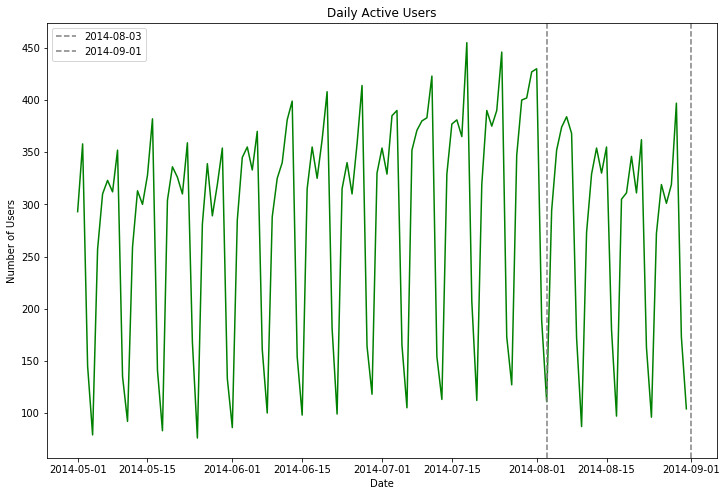

In [307]:
plt.figure(figsize=(12,8))
plt.plot(daily_active_users,color='g')
#plt.plot(activated_week,color='r',marker='.',label='activated')

plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('Daily Active Users')

# create vertical lines
plt.axvline(pd.to_datetime('2014-08-03'),color='grey', linestyle='--', label='2014-08-03')
plt.axvline(pd.to_datetime('2014-09-01'),color='grey', linestyle='--', label='2014-09-01')

plt.legend()
plt.show()

In [302]:
# weekly active user
weekly_engagement = engagement.set_index('occurred_at').groupby([pd.Grouper(freq='W'), 'user_id']).first()
weekly_active_users = weekly_engagement.groupby('occurred_at')['event_type'].count()


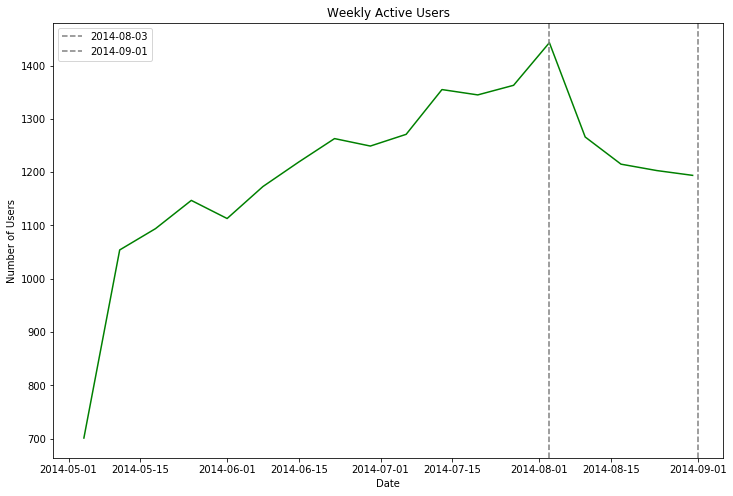

In [343]:
plt.figure(figsize=(12,8))
plt.plot(weekly_active_users,color='g')

plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('Weekly Active Users')

# create vertical lines
plt.axvline(pd.to_datetime('2014-08-03'),color='grey', linestyle='--', label='2014-08-03')
plt.axvline(pd.to_datetime('2014-09-01'),color='grey', linestyle='--', label='2014-09-01')

plt.legend()
plt.show()

In [265]:
# group device into pc and phone
phone = ['iphone 5','samsung galaxy s4','nexus 5','iphone 5s','iphone 4s',
        'amazon fire phone','htc one','nexus 10','nokia lumia 635','nexus 7',
        'samsung galaxy note']
pc = ['macbook pro','lenovo thinkpad','macbook air','dell inspiron notebook',
     'dell inspiron desktop','acer aspire notebook','windows surface',
     'hp pavilion desktop','mac mini','acer aspire desktop',]
tablet = ['asus chromebook','ipad air','samsumg galaxy tablet','kindle fire',
      'ipad mini']


In [270]:
def convert_device(val):
    if val in phone:
        return 'phone'
    elif val in pc:
        return 'pc'
    else:
        return 'tablet'

In [271]:
events['device_type'] = events['device'].apply(convert_device)
print('Unique Values in the Column:', np.unique(events['device_type']))


Unique Values in the Column: ['pc' 'phone' 'tablet']


In [272]:
events.device_type.value_counts()

pc        190125
phone     118604
tablet     32103
Name: device_type, dtype: int64

In [337]:
weekly_device_engagement = weekly_engagement.groupby(['device_type','occurred_at'])['event_type'].count().reset_index()
weekly_device_engagement.set_index('occurred_at', inplace=True)

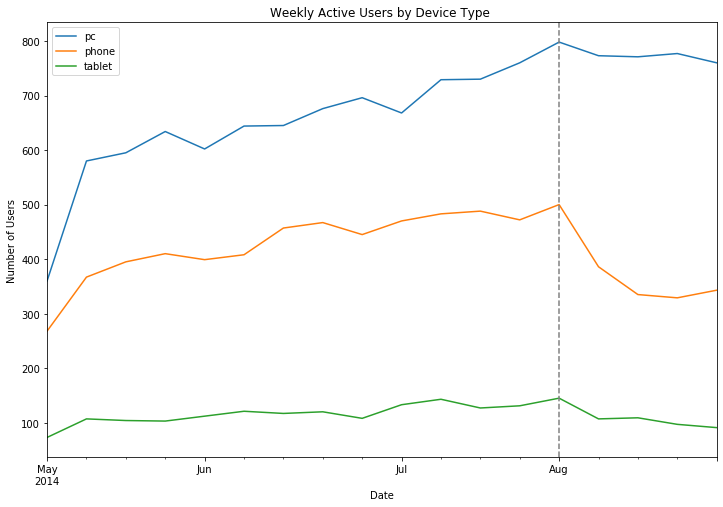

In [345]:
# plot weekly engagement by device type
plt.figure(figsize=(12,8))
weekly_device_engagement.groupby('device_type')['event_type'].plot(legend=True)
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('Weekly Active Users by Device Type ')

# create vertical lines
plt.axvline(pd.to_datetime('2014-08-03'),color='grey', linestyle='--', label='2014-08-03')
plt.axvline(pd.to_datetime('2014-09-01'),color='grey', linestyle='--', label='2014-09-01')
plt.show()

The engagement for phone users has a significant drop. Is the Yammer product not user-friendly in app version?

In [ ]:
# check event name, what activieties users are less engaged? 




# Emails data

In [387]:
# convert to datetime
emails['occurred_at'] = pd.to_datetime(emails['occurred_at'], format='%Y-%m-%d %H:%M:%S')
emails.tail()

,user_id,occurred_at,action,user_type
90384,18814.000,2014-08-31 12:12:26,email_open,3.000
90385,18814.000,2014-08-31 12:12:57,email_clickthrough,3.000
90386,18815.000,2014-08-31 13:39:56,sent_reengagement_email,2.000
90387,18815.000,2014-08-31 13:40:14,email_open,2.000
90388,18815.000,2014-08-31 13:40:47,email_clickthrough,2.000


In [351]:
unique_counts(emails)

user_id : 6179
occurred_at : 123
action : 4
user_type : 3


In [352]:
details = rstr(emails)
display(details.sort_values(by='missing ratio', ascending=False))

Data shape: (90389, 4)
___________________________
Data types:
 object     2
float64    2
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ratio,uniques,skewness,kurtosis
action,object,90389,4,0,0.000,"[[sent_weekly_digest, email_open, email_clickthrough, sent_reengagement_email]]",nan,nan
occurred_at,object,90389,123,0,0.000,"[[2014-05-06, 2014-05-13, 2014-05-20, 2014-05-27, 2014-06-03, 2014-06-10, 2014-06-17, 2014-06-24...",nan,nan
user_id,float64,90389,6179,0,0.000,"[[0.0, 4.0, 8.0, 11.0, 17.0, 19.0, 20.0, 22.0, 30.0, 49.0, 59.0, 64.0, 66.0, 67.0, 78.0, 80.0, 8...",0.050,-1.043
user_type,float64,90389,3,0,0.000,"[[1.0, 3.0, 2.0]]",-0.188,-1.587


- "sent_weekly_digest" means that the user was delivered a digest email showing relevant conversations from the previous day. 
- "email_open" means that the user opened the email.
- "email_clickthrough" means that the user clicked a link in the email
- 'sent_reengagement_email'

In [389]:
# weekly emails

weekly_emails = emails.set_index('occurred_at').groupby(['action',pd.Grouper(freq='W')])['user_id'].count().reset_index()
weekly_emails.set_index('occurred_at', inplace=True)


In [390]:
weekly_emails.head()

,action,user_id
occurred_at,,
2014-05-04,email_clickthrough,187
2014-05-11,email_clickthrough,434
2014-05-18,email_clickthrough,479
2014-05-25,email_clickthrough,498
2014-06-01,email_clickthrough,453


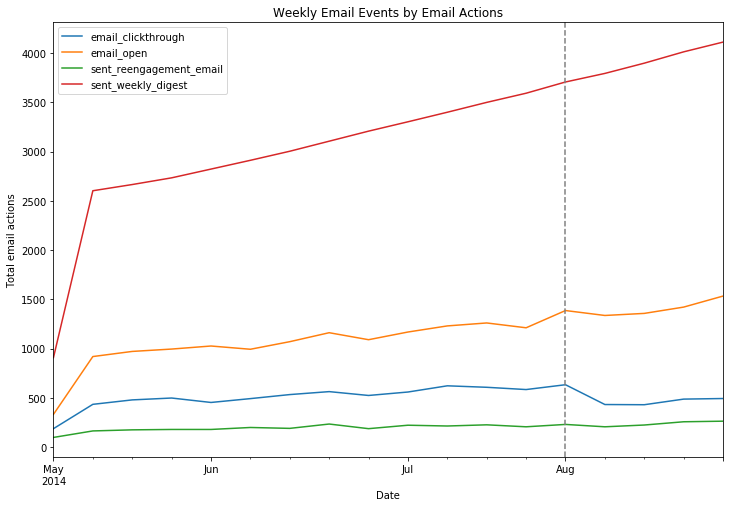

In [392]:
# plot weekly email events by actions
plt.figure(figsize=(12,8))
weekly_emails.groupby('action')['user_id'].plot(legend=True)
plt.xlabel('Date')
plt.ylabel('Total email actions')
plt.title('Weekly Email Events by Email Actions')

# create vertical lines
plt.axvline(pd.to_datetime('2014-08-03'),color='grey', linestyle='--', label='2014-08-03')
plt.axvline(pd.to_datetime('2014-09-01'),color='grey', linestyle='--', label='2014-09-01')
plt.show()

We can see that email_clickthrough has a significant drop. It means that users has decreased interest in clicking links in the email. One linkage is that users that use phones may be less interested in clicking links. Could there be any product optimization in this feature?

# Cohort Analysis on Activated Users

- time cohorts, group customers based on when they started using the product
- behavior cohorts
- size cohorts: based on product use/amount spending

In [531]:
# merge users, events
df = pd.merge(users, events, how='inner', on='user_id')
df.head()

,user_id,created_at,company_id,language,activated_at,state,occurred_at,event_type,event_name,location,device,user_type
0,4.000,2013-01-01 14:37:51,5110.000,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.000
1,4.000,2013-01-01 14:37:51,5110.000,indian,2013-01-01 14:39:05,active,2014-05-13 09:32:10,engagement,home_page,India,lenovo thinkpad,3.000
2,4.000,2013-01-01 14:37:51,5110.000,indian,2013-01-01 14:39:05,active,2014-05-13 09:32:26,engagement,search_autocomplete,India,lenovo thinkpad,3.000
3,4.000,2013-01-01 14:37:51,5110.000,indian,2013-01-01 14:39:05,active,2014-05-13 09:32:58,engagement,search_autocomplete,India,lenovo thinkpad,3.000
4,4.000,2013-01-01 14:37:51,5110.000,indian,2013-01-01 14:39:05,active,2014-05-24 11:39:53,engagement,login,India,samsung galaxy s4,3.000


In [407]:
unique_counts(df)

user_id : 9760
created_at : 9754
company_id : 6950
language : 12
activated_at : 6140
state : 2
occurred_at : 304922
event_type : 2
event_name : 21
location : 47
device : 26
user_type : 3


In [532]:
# keep only active users and has engagement
df = df[(df['state']=='active') & (df['event_type']=='engagement')]

In [423]:
details = rstr(df)
display(details.sort_values(by='missing ratio', ascending=False))

Data shape: (321575, 12)
___________________________
Data types:
 object     9
float64    3
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ratio,uniques,skewness,kurtosis
activated_at,object,321575,6140,0,0.000,"[[2013-01-01 14:39:05, 2013-01-01 04:40:10, 2013-01-01 08:09:17, 2013-01-02 10:57:58, 2013-01-02...",nan,nan
company_id,float64,321575,4453,0,0.000,"[[5110.0, 2698.0, 3745.0, 5025.0, 326.0, 7.0, 545.0, 4148.0, 8727.0, 2296.0, 9229.0, 7927.0, 1.0...",0.513,-1.161
created_at,object,321575,6138,0,0.000,"[[2013-01-01 14:37:51, 2013-01-01 04:38:30, 2013-01-01 08:07:45, 2013-01-02 10:56:15, 2013-01-02...",nan,nan
device,object,321575,26,0,0.000,"[[lenovo thinkpad, samsung galaxy s4, dell inspiron desktop, nexus 7, macbook pro, iphone 5s, ip...",nan,nan
event_name,object,321575,17,0,0.000,"[[login, home_page, search_autocomplete, like_message, view_inbox, search_run, search_click_resu...",nan,nan
event_type,object,321575,1,0,0.000,[[engagement]],nan,nan
language,object,321575,12,0,0.000,"[[indian, french, english, japanese, italian, german, spanish, chinese, portugese, russian, arab...",nan,nan
location,object,321575,47,0,0.000,"[[India, France, United States, Japan, Nigeria, Italy, Germany, Australia, Taiwan, Turkey, Unite...",nan,nan
occurred_at,object,321575,290112,0,0.000,"[[2014-05-13 09:31:47, 2014-05-13 09:32:10, 2014-05-13 09:32:26, 2014-05-13 09:32:58, 2014-05-24...",nan,nan
state,object,321575,1,0,0.000,[[active]],nan,nan


In [504]:
# understand date columns
print('min account creation date: ', df.created_at.min())
print('max account creation date: ', df.created_at.max())
print('min activated date: ', df.activated_at.min())
print('max activated date: ', df.activated_at.max())
print('min product usage date: ', df.occurred_at.min())
print('max product usage date: ', df.occurred_at.max())


min account creation date:  2013-01-01 04:38:30
max account creation date:  2014-08-31 20:21:14
min activated date:  2013-01-01 04:40:10
max activated date:  2014-08-31 20:22:54
min product usage date:  2014-05-01 02:27:15
max product usage date:  2014-08-31 23:03:39


We only has 3 months of product use data, but we have over 1.5 years of users data

In [533]:
# trucate datetime to the first day of the week
def get_month(x):
    import datetime as dt
    return dt.datetime(x.year, x.month, 1)

In [548]:
# create a month of account created column
df['OccurredMonth'] = pd.to_datetime(df['occurred_at'], format='%Y-%m-%d %H:%M:%S').apply(get_month)


In [549]:
grouping = df.groupby('user_id')['OccurredMonth']

In [550]:
# assign acquisition month to each customer
df['CohortMonth'] = grouping.transform('min')

In [537]:
# function to extract year, month, and day
def get_date_int(df,column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
    

In [551]:
event_year, event_month, _ = get_date_int(df, 'OccurredMonth')
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')

In [552]:
# calcualte year and month differnce between them
years_diff = event_year - cohort_year
months_diff = event_month - cohort_month

In [553]:
# convert total difference to month
df['CohortIndex'] = years_diff*12 + months_diff + 1

In [554]:
df['CohortMonth'].value_counts()

2014-05-01    178794
2014-06-01     70330
2014-07-01     49575
2014-08-01     22876
Name: CohortMonth, dtype: int64

In [555]:
df['AccountMonth'].value_counts()

2014-05-01    39750
2014-06-01    39039
2014-07-01    37201
2014-04-01    27679
2014-08-01    20680
2014-03-01    19260
2014-01-01    14877
2014-02-01    14606
2013-10-01    12039
2013-12-01    11978
2013-11-01    11717
2013-08-01    11184
2013-09-01    10588
2013-04-01     9223
2013-07-01     8675
2013-02-01     7691
2013-06-01     7172
2013-05-01     6219
2013-01-01     6162
2013-03-01     5835
Name: AccountMonth, dtype: int64

In [556]:
# count monthly active users from each cohort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])


In [557]:
# count number of customers in each group
cohort_data = grouping['user_id'].nunique()
cohort_data = cohort_data.reset_index()
cohort_data.head()

,CohortMonth,CohortIndex,user_id
0,2014-05-01,1,2361
1,2014-05-01,2,1243
2,2014-05-01,3,997
3,2014-05-01,4,676
4,2014-06-01,1,1362


In [558]:
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns = 'CohortIndex',
                                 values='user_id')

In [559]:
cohort_counts

CohortIndex,1,2,3,4
CohortMonth,,,,
2014-05-01,2361.000,1243.000,997.000,676.000
2014-06-01,1362.000,769.000,372.000,nan
2014-07-01,1292.000,620.000,nan,nan
2014-08-01,1127.000,nan,nan,nan


In [560]:
# calcualate customer retention: how many customers came back in subsequent months

# select first column
cohort_sizes = cohort_counts.iloc[:,0]

# divide all values by cohort size
retention = cohort_counts.divide(cohort_sizes, axis=0)

# round the number, and make it percentage
retention.round(3)*100

CohortIndex,1,2,3,4
CohortMonth,,,,
2014-05-01,100.000,52.600,42.200,28.600
2014-06-01,100.000,56.500,27.300,nan
2014-07-01,100.000,48.000,nan,nan
2014-08-01,100.000,nan,nan,nan


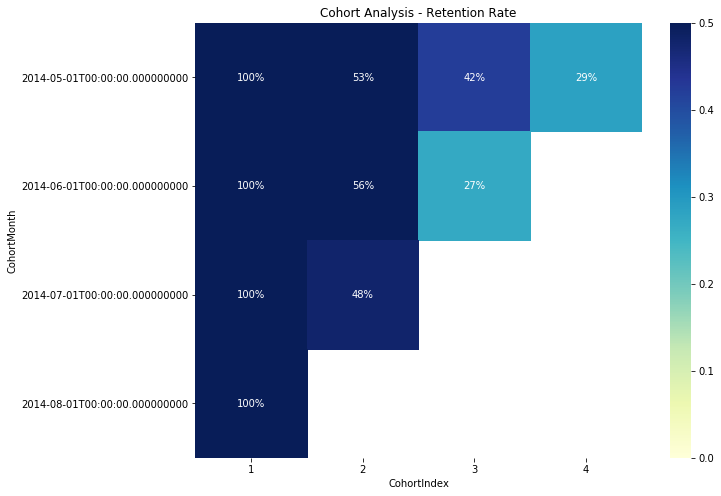

In [564]:
plt.figure(figsize=(10,8))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data=retention,
           annot=True,
           fmt='.0%',
           vmin=0.0,  
           vmax=0.5,
           cmap = "YlGnBu")

In [503]:
# weekly cohorts

# df['OccurredWeek'] = pd.to_datetime(df['occurred_at'], format='%Y-%m-%d %H:%M:%S').apply(get_month)



2013-01-01 04:40:10
2014-08-31 20:22:54
2014-05-01 02:27:15
2014-08-31 23:03:39
2013-01-01 04:38:30
2014-08-31 20:21:14
